# K-Means

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X,_ = make_blobs(random_state=20, centers=4,
                cluster_std=1)

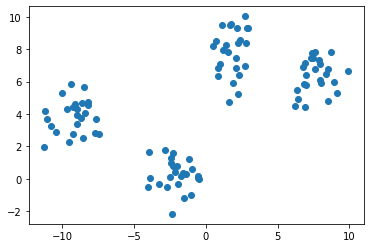

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
cls = KMeans(n_clusters=3)

In [5]:
cls.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# WCSS

In [6]:
wcss = cls.inertia_

In [7]:
wcss

662.9575634308073

In [9]:
wcss = [None]
for k in range(1,10):
    cls = KMeans(n_clusters=k)
    cls.fit(X)
    wcss.append(cls.inertia_)

# wcss.insert(0,None)

In [10]:
wcss

[None,
 4787.388020577273,
 1456.645110240719,
 662.9575634308073,
 209.438547239238,
 173.4536835846311,
 150.38971643382627,
 134.53559352200926,
 110.11463966818036,
 97.59172761301488]

#### elbow method

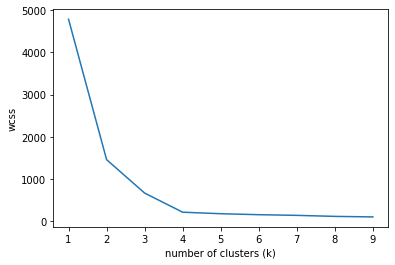

In [11]:
plt.plot(wcss)
plt.xlabel('number of clusters (k)')
plt.ylabel('wcss')
plt.show()

In [13]:
cls = KMeans(n_clusters=2)
cls.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

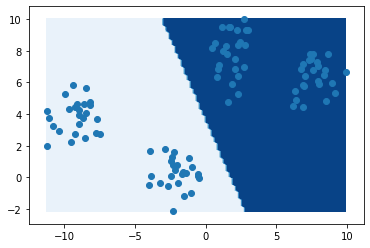

In [14]:
x0_min, x0_max = X[:,0].min(), X[:,0].max()
x1_min, x1_max = X[:,1].min(), X[:,1].max()

x0_new = np.linspace(x0_min, x0_max, num=100)
x1_new = np.linspace(x1_min, x1_max, num=100)

xx0, xx1 = np.meshgrid(x0_new, x1_new)

X_new = np.c_[xx0.ravel(), xx1.ravel()]
cluster = cls.predict(X_new)

plt.contourf(xx0,xx1, cluster.reshape(xx0.shape),
            cmap = plt.cm.Blues)
plt.scatter(X[:,0],X[:,1])
plt.show()


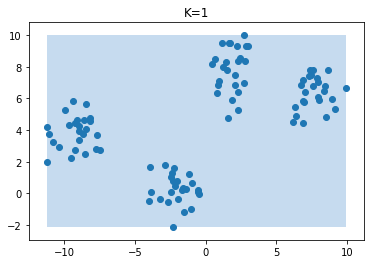

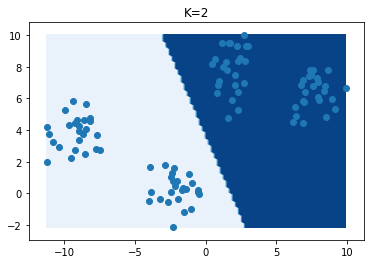

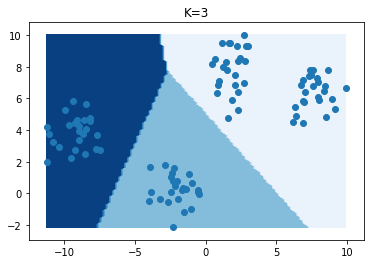

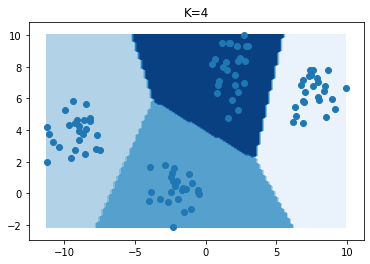

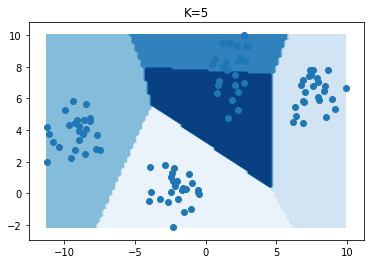

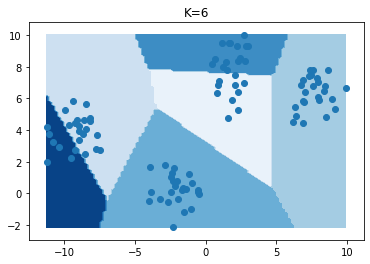

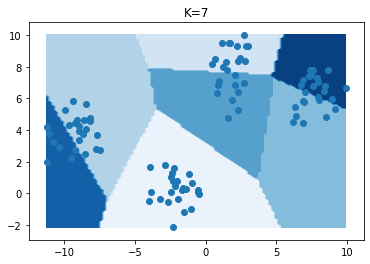

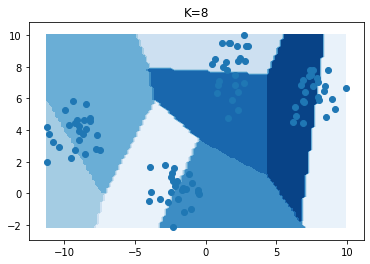

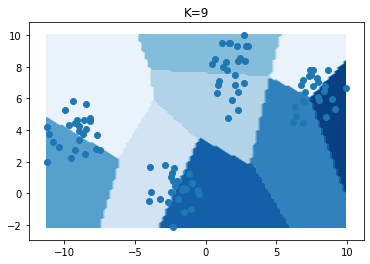

In [15]:
for i in range(1,10):
    cls = KMeans(n_clusters=i)
    cls.fit(X)
    
    x0_min, x0_max = X[:,0].min(), X[:,0].max()
    x1_min, x1_max = X[:,1].min(), X[:,1].max()

    x0_new = np.linspace(x0_min, x0_max, num=100)
    x1_new = np.linspace(x1_min, x1_max, num=100)

    xx0, xx1 = np.meshgrid(x0_new, x1_new)

    X_new = np.c_[xx0.ravel(), xx1.ravel()]
    cluster = cls.predict(X_new)

    plt.contourf(xx0,xx1, cluster.reshape(xx0.shape),
                cmap = plt.cm.Blues)
    plt.scatter(X[:,0],X[:,1])
    plt.title(f'K={i}')
    plt.show()